# Session 1 - Elasticsearch - Zipf/Heaps laws

## 1. Running Elasticsearch

 During the first part of this session we will configure and run an Elasticsearch instance. 

**Read the first section of the documentation and follow its instructions.**

After following the instructions you should test if Elasticsearch is up and running using the script `elastic-test.py`.

The answer that you should get is the following:

In [1]:
%run elastic_test.py

b'{\n  "name" : "aul-1919",\n  "cluster_name" : "elasticsearch",\n  "cluster_uuid" : "XrBUbMRoSTOui14EpwseIw",\n  "version" : {\n    "number" : "7.17.12",\n    "build_flavor" : "default",\n    "build_type" : "deb",\n    "build_hash" : "e3b0c3d3c5c130e1dc6d567d6baef1c73eeb2059",\n    "build_date" : "2023-07-20T05:33:33.690180787Z",\n    "build_snapshot" : false,\n    "lucene_version" : "8.11.1",\n    "minimum_wire_compatibility_version" : "6.8.0",\n    "minimum_index_compatibility_version" : "6.0.0-beta1"\n  },\n  "tagline" : "You Know, for Search"\n}\n'


***

## 2. Indexing and querying

**Take a moment to read section 2 of the documentation **

Elasticsearch is a database that allows storing documents (tables do not need a predefined schema as in relational databases). Text in these documents can be processed so the queries extend beyond exact matches allowing complex queries, fuzzy matching and ranking documents respect to the actual match. 

These kind of databases are behind search engines like Google Search or Bing.

There are different ways of operating with Elasticsearch. It is deployed esentially as a web service with a REST API, so we can accessed basically from any language with a library for operating with HTTP servers. You have a link to the full documentation in the session document.

We are going to use two Python libraries for programming `elasticsearch` and `elasticsearch-dsl`. Both provide access to Elasticsearch functionalities hidding and making more programming friendly the interactions, the second one is more convenient for configurating and searching.

We are only going to see the essential elements for developing the session but feel free to learn a little bit more. 


To interact with Elasticsearch with need a client object of type `Elasticsearch`, if we have running the server in the localhost and with the default configuration we don't need to pass any parameters to the object.

In [2]:
from __future__ import print_function
from elasticsearch import Elasticsearch

client = Elasticsearch()

With this client you have a connection for operating with Elastic search. Now we will create an index. There are index operations in each libraty, but the one in `elasticseach-dsl` is simpler to use.

In [3]:
from elasticsearch_dsl import Index

index = Index('test', using=client)

First we will need some text to index, for testing purposes we are going to use the Python library `loremipsum`. We will need to install it first if it is not installed already, uncomment the code in next cell if you need to install the library.

In [6]:
!pip3 install loremipsum --user  # Restart the kernel if you are not able to import the library in the next cell

  Created wheel for loremipsum: filename=loremipsum-1.0.5-py3-none-any.whl size=11674 sha256=8a15494edb109cac35b358bc26e2d6577f1f6790343d77616bbf5f4750d4344f
  Stored in directory: /home/est/c6890730/.cache/pip/wheels/68/6b/b1/0d372d8a335699e8027f3bfad3173836bee3ec672384295375
Successfully built loremipsum


Now we create some random paragraphs.

In [7]:
from loremipsum import get_paragraphs
text = get_paragraphs(10)
print(text[0])

B'elit' b'ad'. B'arcu' b've'. B'cras' b'ac' b'a' b'a' b'dis' b'metus'. B'amet' b'at'. B'amet' b'in' b'a' b'hac' b'nisl' b'a'. B'pede' b'mi' b'id' b'lorem'. B'eget' b'ac' b'a' b'nec' b'a' b'nullam' b'a' b'a' b'nullam'. B'urna' b'ut' b'ac' b'sem' b'a'. B'cras' b'ac' b'a' b'donec' b'nibh' b'imperdiet' b'nullam' b'id' b'a' b'semper' b'tincidunt' b'a'. B'eget' b'et'. B'cras' b've'. B'nunc' b'eu' b'nisi'. B'diam' b'id' b've' b'ad' b'mi' b'quis' b'a' b'a' b'eget' b'a' b'urna' b'a'. B'quis' b'ad' b'a' b'ac' b'diam' b'a'. B'erat' b'ut' b'a' b'a'. B'eros' b'in'. B'quis' b'ac' b'a' b'ut' b'eni' b'massa' b'a' b'a' b'a' b'a'. B'arcu' b'ac' b'a' b'a' b'a' b'a'. B'pede' b'ac' b'a' b'a' b'a' b'metus'. B'nisi' b'at' b'a' b'justo'. B'nisl' b'ad' b'ut' b'eni'. B'enim' b'ut' b'a' b'at' b'pede' b'nec' b'a' b'sed' b'odio' b'eget'. B'nisi' b'at' b'a' b'nibh' b'a' b'eu'. B'enim' b'in'. B'odio' b'eu' b'a' b'hac' b'sem'. B'arcu' b'et' b'a' b'a' b'dui' b'varius' b'a' b'cum' b'a' b'a'. B'elit' b'ac' b'nisi' b'ame

Now we can index the paragraphs in Elasticsearch using the `create` method, we can indicate a type of document that will allow to group documents of the same kind inside an index. The document is passed as the `body` parameter as a Python dictionary. The keys of the dictionary will be the fields of the document, in this case we will have only one (`text`).

In [8]:
for t in text:
    client.index(index='test', doc_type='_doc', body={'text': t})

Now we can search the documents.

In [9]:
from elasticsearch_dsl import Search
s = Search(using=client, index='test')

s = s.query('match', text="B'duis'")

response = s.execute()

for hit in response:
    print('ID= %s Text= %s' % (hit.meta.id, hit.text[:75]))

ID= w94BsooBCzFMCfIrj7bv Text= B'pede' b'et' b'a' b'mi' b'in'. B'urna' b'ad' b'elit' b'a'. B'duis' b've' b
ID= wd4BsooBCzFMCfIrj7a- Text= B'duis' b'in' b'a' b'sit' b'id' b'a' b'odio'. B'pede' b'mi' b'a' b'a'. B'er
ID= v94BsooBCzFMCfIrj7aQ Text= B'ante' b'at' b'quis' b'sed'. B'eget' b'et' b'ad' b'a' b'eros' b'netus' b'a
ID= wt4BsooBCzFMCfIrj7bW Text= B'duis' b'at' b'a'. B'erat' b'eu'. B'elit' b'ad' b'a' b'cras' b'vel' b'a'. 
ID= xd4BsooBCzFMCfIrkLYV Text= B'urna' b'ad'. B'eros' b'et' b'natoque'. B'nibh' b'ac' b'a' b'a' b'velit' b
ID= vd4BsooBCzFMCfIrjbbw Text= B'elit' b'ad'. B'arcu' b've'. B'cras' b'ac' b'a' b'a' b'dis' b'metus'. B'am
ID= vt4BsooBCzFMCfIrj7ZI Text= B'nibh' b'eu' b'a' b'dis' b'a' b'a' b'a' b'a'. B'duis' b'et' b'a'. B'eros' 
ID= wN4BsooBCzFMCfIrj7aq Text= B'arcu' b'id'. B'nisi' b'mi' b've' b'ad' b'a'. B'nibh' b'ac' b'a' b'libero'
ID= xt4BsooBCzFMCfIrkLYp Text= B'amet' b'et' b'a' b'ultrices' b'duis' b'a' b'a'. B'elit' b'mi' b'a' b'matt
ID= xN4BsooBCzFMCfIrkLYC Text= B'arcu

***

## 2.1 Anatomy of an indexing

Now we are ready for indexing some files, download the two sets of files linked in the documentation (*20_newsgroups* and *novels*) and follow the instructions.

 **Follow the instructions** and after that edit the script `IndexFiles.py` and understand how the indexing is performed, you will see that instead of inserting the documents one by one the `bulk` method is used for a more efficient indexing.

***

## 2.2 Searching

Now we are ready for query the documents. You have the script `SearchIndex.py` for this purpose, you can invoke the script with three flags:

* `--index` that correponds with the index of the files
* `--text` that searches for a word in the text field of the documents of the index
* `--query` that allows using LUCENE syntax for querying the index


These last two flags are mutually exclusive and the first one takes precedence.

LUCENE syntax allows to use boolean operators in the query (AND, OR, NOT) always upper case and the fuzzy operator `~` with a number $n$ that matches the word allowing up to $n$ mismatches in the string.

**Follow the instructions** of the documentation and query the documents indexed. Browse the code and look into the documentation of `elasticsearch-dsl` to learn more about how a query is defined.

***

## 3 Zipf's and Heaps' Laws

Now we can work in the tasks for this session. You will have to test if the Zipf and Heaps Laws hold in the documents that you have.

You will need a count of the words in all the documents. Elasticsearch allows querying these counts from the ids of the documents.

For example:

In [10]:
from elasticsearch.helpers import scan

# Search for all the documents and query the list of (word, frequency) of each one
# Totals are accumulated in a dictionary
voc = {}
sc = scan(client, index='test', query={"query" : {"match_all": {}}})
for s in sc:
    tv = client.termvectors(index='test', id=s['_id'], fields=['text'])
    if 'text' in tv['term_vectors']:
        for t in tv['term_vectors']['text']['terms']:
            if t in voc:
                voc[t] += tv['term_vectors']['text']['terms'][t]['term_freq']
            else:
                voc[t] = tv['term_vectors']['text']['terms'][t]['term_freq']

lpal = sorted(voc.items(), reverse=True, key=lambda x: x[1])

pal, freq = [p for p, _ in lpal], [f for _, f in lpal]

print(pal[:5], freq[:5])
print(pal[-5:], freq[-5:])

["b'a", "b'id", "b've", "b'ac", "b'in"] [4381, 403, 395, 393, 389]
["b'vehicula", "b'condimentum", "b'penatibus", "b'parturient", "b'suspendisse"] [3, 2, 2, 2, 2]


Now we can plot the words frequencies (have in mind that this text is artifically generated).

187


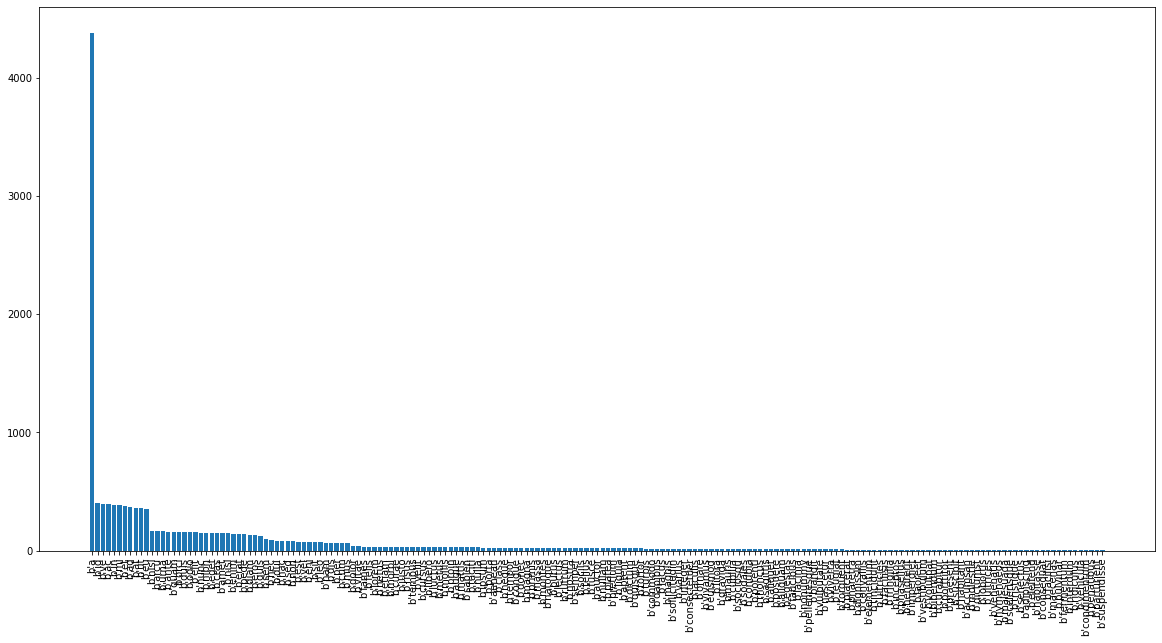

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

print(len(pal))

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(pal)), freq)
a= plt.xticks(range(len(pal)), pal, rotation='vertical')

The `CountWords.py` script will generate the list of words and their frequency for an index. 

**Follow the instructions** in the documentation and **pay attention** to the documentation that you have to deliver for this session. 